In [306]:
import argparse
import numpy as np
import networkx as nx
import slam.plot as splt
import slam.topology as stop
import slam.generate_parametric_surfaces as sgps
import trimesh
import os
import networkx as nx
import numpy as np
from visbrain.objects import SourceObj, ConnectObj, ColorbarObj
import tools.graph_processing as gp
import slam.differential_geometry as sdg
import random
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
def remove_dummy_nodes(graph):
    G = graph.copy()
    to_remove = []
    for (p, d) in G.nodes(data=True):
        if d['is_dummy'] == True:
            to_remove.append(p)
    G.remove_nodes_from(to_remove)
    return G

In [166]:
def mean_edge_len(G):
    
    all_geo = [z['geodesic_distance'] for x,y,z in list(G.edges.data())]
    mean_geo = np.array(all_geo).mean()
    std = np.std(all_geo)
    
    return mean_geo,std,all_geo

In [167]:
#generate random color codes for plotting
def generate_random_color_codes(num_colors):
    
    number_of_colors = num_colors
    
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
    
    return color

In [335]:
path = "/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/0/noise_1000,outliers_0/graphs/"
path_real = "/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/OASIS_full_batch/modified_graphs/"
simu_path = "/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/0/"

In [337]:
all_noise_degree = []
folder_name = os.listdir(simu_path)

for folder in folder_name:
    if os.path.isdir(simu_path+folder):
        print(folder)
        graph_path = simu_path+folder+'/'+'graphs/'
        
        degree_simu = []
        
        for graph in os.listdir(graph_path):
            G = nx.read_gpickle(graph_path + graph) #read the graphs
            mean_degree = list(dict(nx.degree(G)).values())
            degree_simu.append(mean_degree)
            
        all_noise_degree.append(degree_simu)

noise_1000,outliers_4
noise_1000,outliers_8
noise_1000,outliers_12
noise_1000,outliers_16
noise_1000,outliers_0


In [342]:
len(all_noise_degree[0])

134

In [203]:
degree_list = []
mean_degree_real = []
for graph in os.listdir(path_real):
    G = nx.read_gpickle(path_real + graph) #read the graphs
    G = remove_dummy_nodes(G)
    G.remove_edges_from(nx.selfloop_edges(G))
    mean_degree_real.append(list(dict(nx.degree(G)).values()))
    #new_G = remove_dummy_nodes(G)
    #new_G.remove_edges_from(nx.selfloop_edges(new_G)) # remove self loops
    #degree_list.append(list(dict(nx.degree(G)).values()))

In [346]:
# plt.figure(figsize=(13,8))
# bins = 60
# #mean_geo = [mean_geo_simu,mean_geo_real]

# plt.hist(mean_degree_simu, bins, alpha=0.7, label='Mean degree Simu')
# plt.hist(mean_degree_real, bins, alpha=0.7, label='Mean degree real')
# plt.legend(loc='upper right')
# plt.xlabel('mean degree real and simu')
# plt.ylabel('Density')
# plt.show()

In [200]:
#counts, bins = np.histogram(np.array(mean_degree_simu[3]),bins = 12)
#counts
#bins

In [347]:
def interval_to_values(list_array,bins=2):
    values = []
    counts,bins = np.histogram(list_array,bins)
    for i in range(len(bins)-1):
        tmp_list = []
        for j in list_array:
            if i+1 == (len(bins)-1):
                if bins[i]<= j <= bins[i+1]:
                    tmp_list.append(j)
            else:
                if bins[i]<= j < bins[i+1]:
                    tmp_list.append(j)
        if len(tmp_list) != counts[i]:
            print("counts doesn't match retrieved values at index ",i)
        values.append(tmp_list)
    return values,bins

In [287]:
#values_real,bins_real = interval_to_values(flat_list,bins = 6)

In [290]:
#avg_bins_real = [np.mean(x) for x in values_real]

In [291]:
#len(values_real)

In [297]:
values_simu, bins_simu = interval_to_values(np.array(mean_degree_simu).flatten(),bins =6)

In [299]:
#avg_bins_simu = [np.mean(x) for x in values_simu]

In [357]:
folder_name[1:]

['noise_1000,outliers_4',
 'noise_1000,outliers_8',
 'noise_1000,outliers_12',
 'noise_1000,outliers_16',
 'noise_1000,outliers_0']

In [358]:
flat_list_real = [item for sublist in mean_degree_real for item in sublist]
flat_list_simu_4 = [item for sublist in all_noise_degree[0] for item in sublist]
flat_list_simu_8 = [item for sublist in all_noise_degree[1] for item in sublist]
flat_list_simu_12 = [item for sublist in all_noise_degree[2] for item in sublist]
flat_list_simu_16 = [item for sublist in all_noise_degree[3] for item in sublist]
flat_list_simu_0 = [item for sublist in all_noise_degree[4] for item in sublist]

In [328]:
# plt.figure(figsize=(14,9))
# for arr in [flat_list_real]+[flat_list_simu]:
#     plt.hist(arr, bins = 14)
# plt.xlabel('Degree')
# plt.ylabel('Density')

Text(0, 0.5, 'Density')

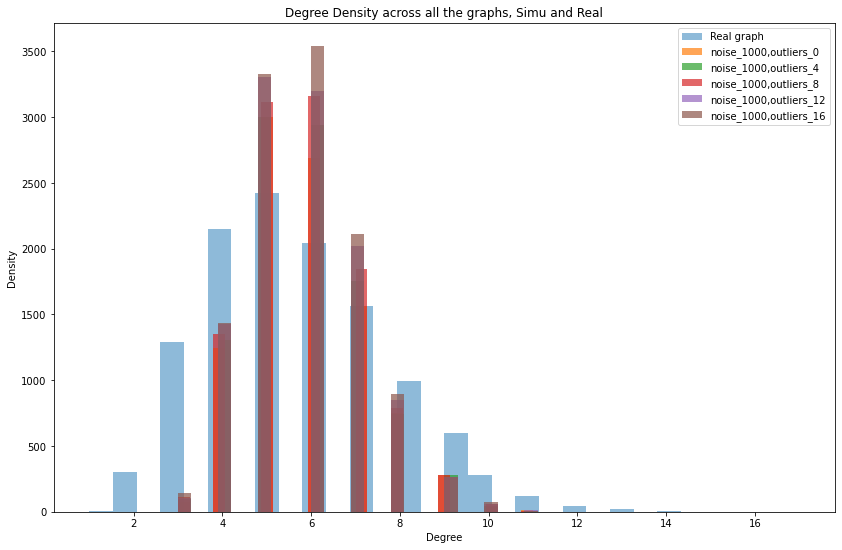

In [368]:
plt.figure(figsize=(14,9))
    
plt.hist(flat_list_real, bins = 30,label='Real graph',alpha = 0.5)
plt.hist(flat_list_simu_0, bins = 30,label ='noise_1000,outliers_0',alpha = 0.7)
plt.hist(flat_list_simu_4, bins = 30,label ='noise_1000,outliers_4',alpha = 0.7)
plt.hist(flat_list_simu_8, bins = 30,label ='noise_1000,outliers_8',alpha = 0.7)
plt.hist(flat_list_simu_12, bins = 30,label ='noise_1000,outliers_12',alpha = 0.7)
plt.hist(flat_list_simu_16, bins = 30,label ='noise_1000,outliers_16',alpha = 0.7)

plt.title("Degree Density across all the graphs, Simu and Real")
plt.legend(loc='upper right')
plt.xlabel('Degree')
plt.ylabel('Density')

In [317]:
# #simu_graph_names = [name for name in os.listdir(simu_path) if os.path.isdir(simu_path+name)]

# color = generate_random_color_codes(2)

# #real_graph_names = ["R_"+names for names in os.listdir(real_path)]

# fig = ff.create_distplot([avg_bins_real]+[avg_bins_simu],["real_graph"] + ["simu_grpah"]
#                          , show_hist=False,bin_size=.2, colors=color)

# # Add title
# fig.update_layout(title_text='Average degree for simu graphs and real graphs')
# fig.show()

Text(0, 0.5, 'Density')

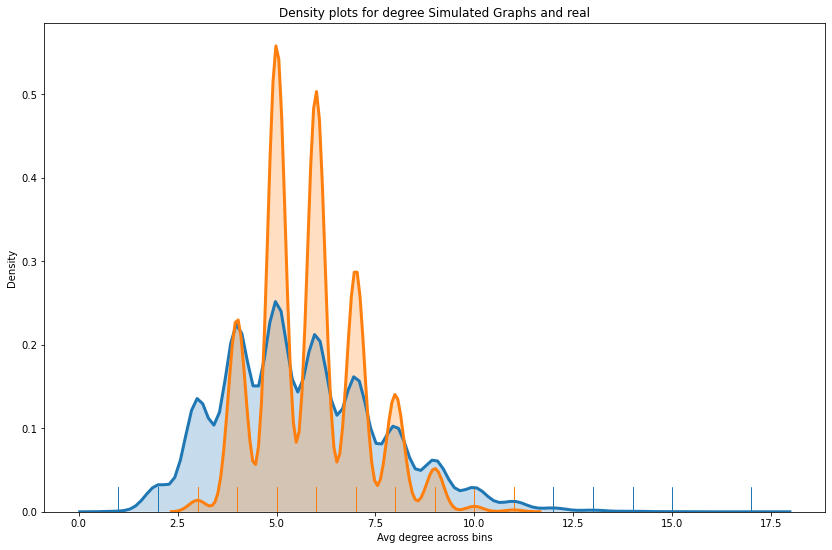

In [325]:
plt.figure(figsize=(14,9))
for arr in [flat_list_real]+[flat_list_simu]:
    sns.distplot(arr, hist = False, kde = True,norm_hist = False,rug = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.title("Density plots for degree Simulated Graphs and real")
plt.xlabel('Avg degree across bins')
plt.ylabel('Density')

In [98]:
#lst = mean_degree_simu[1].copy()
# main_list = []
# for i in range(len(bins)-1):
#     tmp_list = []
#     for j in lst:
#         if i+1 == (len(bins)-1):
#             if bins[i]<= j <= bins[i+1]:
#                 tmp_list.append(j)
#         else:
#             if bins[i]<= j < bins[i+1]:
#                 tmp_list.append(j)
#     print(tmp_list)
#     main_list.append(tmp_list)

In [15]:
#values = interval_to_values(mean_degree_simu[0],bins=4)

In [100]:
#(n, bins_hist, patches) = plt.hist(mean_degree_simu[0], bins=4, label='hst')

In [10]:
geo_dist_all = []
mean_geo_simu = []
for graph in os.listdir(path):
    G = nx.read_gpickle(path + graph) #read the graphs
    
    mean_geo,std,all_geo = mean_edge_len(G)
    
    geo_dist_all.append(all_geo)
    mean_geo_simu.append(mean_geo)

In [11]:
# color = generate_random_color_codes(len(geo_dist_all))
# fig = ff.create_distplot(geo_dist_all, os.listdir(path), show_hist=False, colors=color)

# # Add title
# fig.update_layout(title_text='Geo dist reference graphs')
# fig.show()

In [12]:
geo_dist_all_real = []
mean_geo_real = []
for graph in os.listdir(path_real):
    G = nx.read_gpickle(path_real + graph) #read the graphs
    G = remove_dummy_nodes(G)
    G.remove_edges_from(nx.selfloop_edges(G))
    mean_geo,std,all_geo = mean_edge_len(G)
    geo_dist_all_real.append(all_geo)
    mean_geo_real.append(mean_geo)

In [13]:
# color = generate_random_color_codes(len(geo_dist_all_real))
# fig = ff.create_distplot(geo_dist_all_real, os.listdir(path_real), show_hist=False, colors=color)

# # Add title
# fig.update_layout(title_text='Geo dist real graphs')
# fig.show()

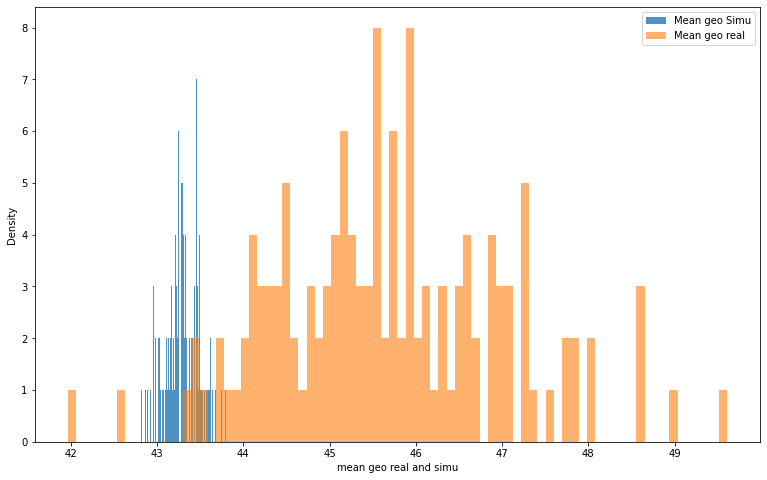

In [15]:
plt.figure(figsize=(13,8))
bins = 80
#mean_geo = [mean_geo_simu,mean_geo_real]

plt.hist(mean_geo_simu, bins, alpha=0.8, label='Mean geo Simu')
plt.hist(mean_geo_real, bins, alpha=0.6, label='Mean geo real')
plt.legend(loc='upper right')
plt.xlabel('mean geo real and simu')
plt.ylabel('Density')
plt.show()

In [16]:
min_real_list = []
for i in geo_dist_all_real:
    min_real_list.append(min(i))

In [17]:
#plt.hist(min_real_list,bins = 30)

In [18]:
min_simu_list = []
for i in geo_dist_all:
    min_simu_list.append(min(i))
#plt.hist(min_simu_list,bins = 30)

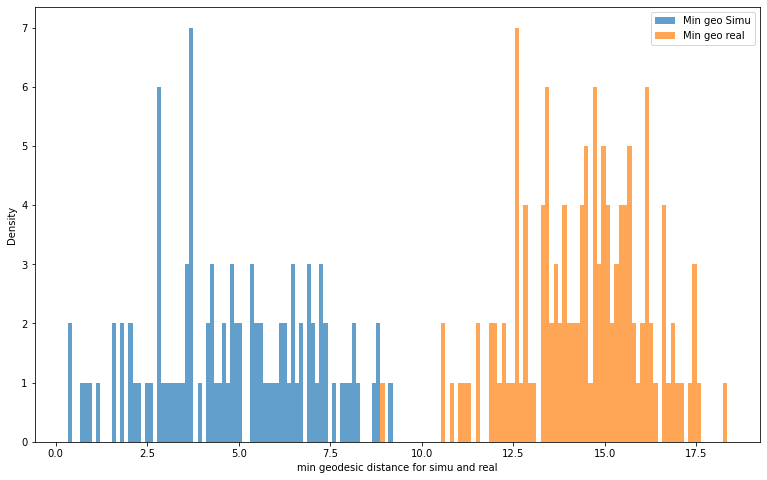

In [19]:
plt.figure(figsize=(13,8))

plt.hist(min_simu_list, bins, alpha=0.7, label='Min geo Simu')
plt.hist(min_real_list, bins, alpha=0.7, label='Min geo real')
plt.legend(loc='upper right')
plt.xlabel('min geodesic distance for simu and real')
plt.ylabel('Density')
plt.show()    

In [376]:
import networkx as nx

In [373]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [377]:
g1 = nx.read_gpickle("graph_0.gpickle")
g2 = nx.read_gpickle("graph_1.gpickle")

In [385]:
#list(g1.nodes(data=True))

In [386]:
#list(g2.nodes(data=True))

In [387]:
data = np.load("ground_truth.npy")